In [1]:
from fastai import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from fastai.vision import *

In [1]:
!pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.2.5)


In [2]:
from fastai.vision.all import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = Path('/content/drive/MyDrive/kalem')

In [5]:
telefs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.4, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

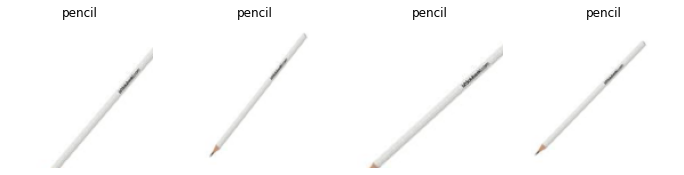

In [6]:
telefs = telefs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = telefs.dataloaders(path,bs = 29)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.718147,1.248788,0.416667,00:07
1,0.805778,2.326515,0.625000,00:00
2,0.560882,5.170971,0.625000,00:00
3,0.418502,6.116673,0.625000,00:00
4,0.415742,5.299186,0.583333,00:00


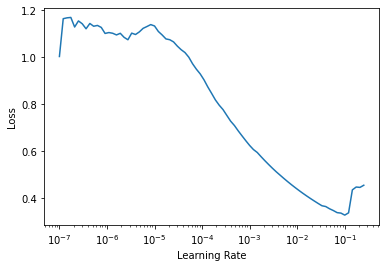

In [7]:
learn = cnn_learner(dls, resnet101, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()

learn.fit_one_cycle(5)

In [8]:
print(f"Minimum/10: {lr_min:.1e}, steepes point: {lr_steep:.1e}")

Minimum/10: 1.0e-02, steepes point: 1.1e-04


In [9]:
learn = cnn_learner(dls, resnet101, metrics=error_rate)
learn.fine_tune(3, base_lr=4e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.379534,5.692331,0.666667,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.582299,6.260654,0.666667,00:00
1,0.388415,8.369868,0.666667,00:00
2,0.262084,7.455259,0.625000,00:00


In [10]:
learn.unfreeze()

SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=1.0964781722577754e-06)

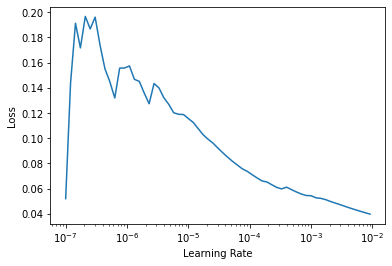

In [11]:
learn.lr_find()


In [12]:
learn.fit_one_cycle(4, lr_max=slice(1e-5, 1e-3))


epoch,train_loss,valid_loss,error_rate,time
0,0.000715,5.608313,0.583333,00:00
1,0.075386,1.974522,0.291667,00:00
2,0.074382,0.762861,0.125000,00:00
3,0.081765,0.541097,0.083333,00:00


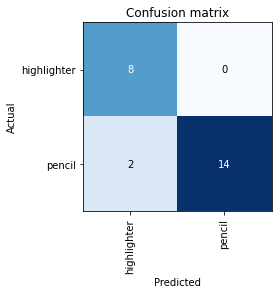

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

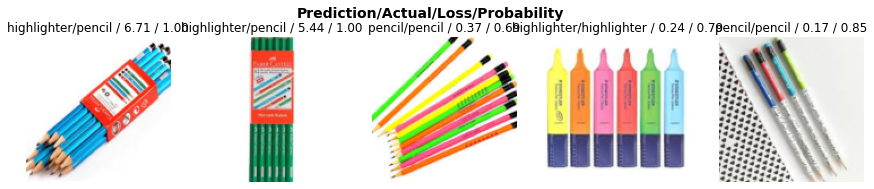

In [37]:
interp.plot_top_losses(5 , nrows=1)

In [40]:
from fastai.vision.widgets import *

In [41]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [42]:
cleaner =ImageClassifierCleaner(learn)
ImageClassifierCleaner

fastai.vision.widgets.ImageClassifierCleaner

In [43]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [44]:
learn.export()

In [45]:
path = Path()
path.ls(file_exts=".pk1")

(#0) []

In [46]:
learn_inf = load_learner(path/'export.pkl')

In [70]:
learn_inf.dls.vocab

['highlighter', 'pencil']

In [48]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

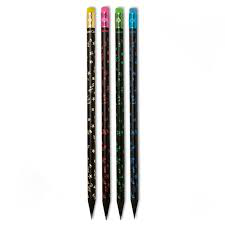

In [49]:
img = PILImage.create(btn_upload.data[-1])
img

In [50]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [51]:
pred,pred_idx,probs = learn_inf.predict(img)

In [52]:
lbl_pred = widgets.Label()
lbl_pred.value = "please choose an image"
lbl_pred

Label(value='please choose an image')

In [53]:
btn_run = widgets.Button(description = "classify")
btn_run

Button(description='classify', style=ButtonStyle())

In [54]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [55]:
btn_upload = widgets.FileUpload()

In [57]:
VBox([widgets.Label('Select the pen'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [1]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
